#Exploratory Data Analysis on Haberman's Cancer Survival Data Set

This data set contains data from a study conducted b/w **1958-1970** in University of Chicago's Billings Hospital. It is about the survival of patients who had undergone surgery for **breast cancer**.

##Important Definition- Axillary nodes

The **axillary lymph nodes** are present in between the armpit and the breast. They carry the lymph from the breast to the arms. Even the breast cancer cells spread through these nodes first before they spread to any other part of the body as they form a connection between the arms and the breast.

#OBJECTIVE:
##To find the best case scenario for a patient in the dataset to survive 5 years or longer post the operation.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import files
upload = files.upload()

Saving haberman.csv to haberman (1).csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(upload['haberman.csv']))
df= pd.read_csv("haberman.csv", header=[0])
df

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


##Observations
* The above data-set contains **4 features**(4 columns) and **306 data points**. All column contains equal number of entries.
* The data does not say whether the surgery was succesful or not.




In [7]:

print(df.columns)
#Number of data-points(rows) and number of features(columns)
print(df.shape)

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')
(306, 4)


* Age= Age of the patient at the time of operation.
* Op_year= Year of operation between 1958-1970.
* axil_nodes= Number of axillary nodes.
* Surv_status= After the operation, if the patient has survived for 5 years or longer, the survival status is recorded as 1.
If the patient has died before 5 years, it is recorded as 2. Hence Surv_status becomes the class variable

In [8]:
#CLASS VARIABLE= "Surv_status"
df["Surv_status"].value_counts()


1    225
2     81
Name: Surv_status, dtype: int64

#Observations
* This is an **imbalanced Data Set** as the number of people who survived for 5 years/ longer (**1**) after the operation and the number of people who died before 5 years (**2**) after the operation is not equal.
* The number of people who survived for 5 years or longer are **almost 3 times** of the number of people who died within 5 years.




In [9]:
df.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#Observations
*   The minimum age of the patients is **30** and the maximum age is **83** and the **mean age** is **52.45**
*   The minimum number of axillary nodes is **0** and the maximum is **52**, whereas the average number of axillary nodes is approximately **4**. Adding the std-dev to the mean, we see that most nodes lie in the range (4 + 7.18) or 4 to 12. Hence the data set clearly contains outliers (extreme points with respect to the mean),such as 52.



##Separating the dataframe into two different dataframes df1 (5 years and longer) and df2 (death before 5 years), we have 

In [10]:
#Dataframe of all patients who survived for 5 years or more= df1
#Dataframe of all patients who died within 5 years= df2

df1=df[df['Surv_status']==1]
df2=df[df['Surv_status']==2]
print(df1)
print('__________________________________________')
print(df2)

     Age  Op_Year  axil_nodes  Surv_status
0     30       64           1            1
1     30       62           3            1
2     30       65           0            1
3     31       59           2            1
4     31       65           4            1
..   ...      ...         ...          ...
298   73       68           0            1
300   74       63           0            1
301   75       62           1            1
302   76       67           0            1
303   77       65           3            1

[225 rows x 4 columns]
__________________________________________
     Age  Op_Year  axil_nodes  Surv_status
7     34       59           0            2
8     34       66           9            2
24    38       69          21            2
34    39       66           0            2
43    41       60          23            2
..   ...      ...         ...          ...
286   70       58           4            2
293   72       63           0            2
299   74       65           3 

#1. Univariate Analysis

Univariate analysis is performed for each variable

##a) Histogram and Probability Density Curves

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


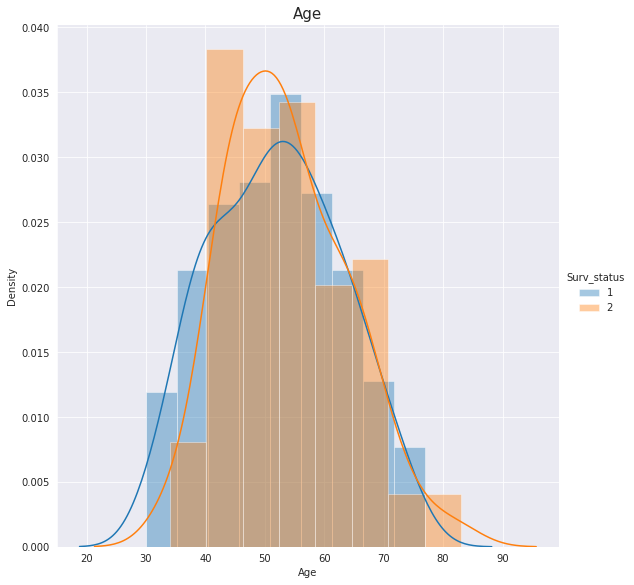

In [11]:
#1. Univariate Analysis of "Age"
sns.set_style("darkgrid")
b=sns.FacetGrid(df,hue="Surv_status",height=8)
b.map(sns.distplot,'Age')
b.add_legend()

plt.title('Age', fontsize=15)
plt.show()


#Observations

*  There is a large amount of overlap of the number of patients who have died within 5 years and those who survived 5 years or more after the operation. Hence a solid conclusion cannot be drawn with respect to the age of the person and survival status.
* But Looking at the plot, I can see that the patients whose age is between **30-40** have more chances of surviving for more than 5 years than the others, but still it CANNOT be concluded that the the survival rate is proportional to the age as we see that more people whose age is b/w 70-80 have survived for more than 5 years than the number of people whose age is b/w 40-70.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


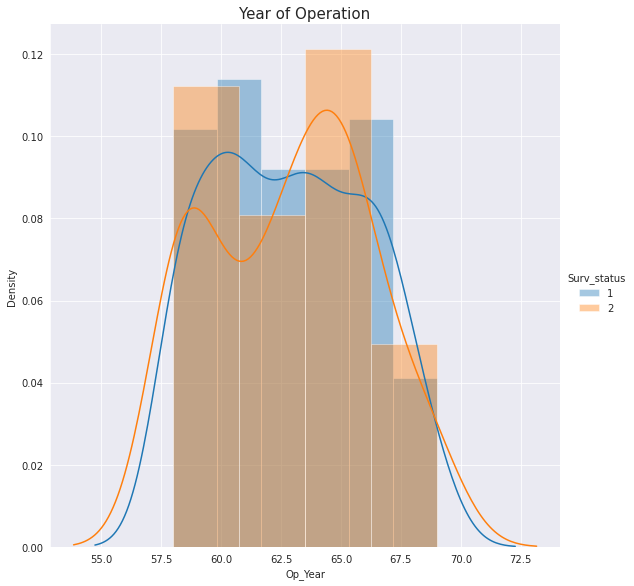

In [12]:
#2. Univariate Analysis of "Op_Year"
sns.set_style("darkgrid")
b=sns.FacetGrid(df,hue="Surv_status",height=8)
b.map(sns.distplot,'Op_Year')
b.add_legend()

plt.title('Year of Operation', fontsize=15)
plt.show()


#Observations
*   There is little that can be concluded using this plot of operation year, as  there is a lot of overlap.
*   One thing that can be seen is that during the year **1965** and **1967**, the number of people who survived for 5 years or longer is **almost twice** of that who died within 5 years. The reason for this is unknown.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


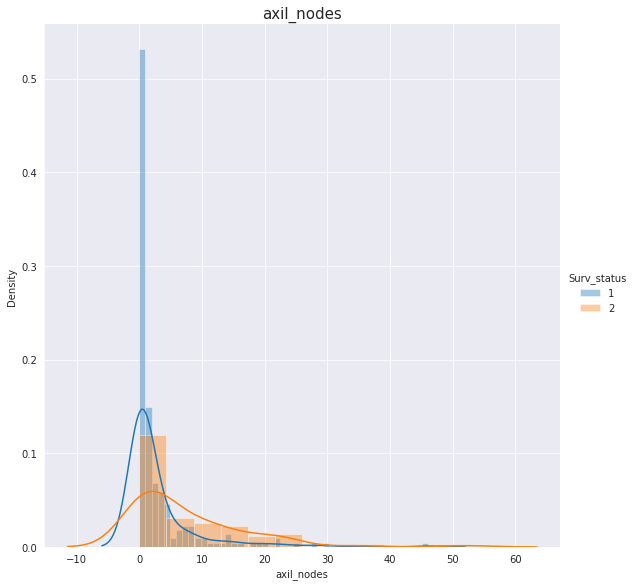

In [13]:
#3. Univariate Analysis of "axil_nodes"
sns.set_style("darkgrid")
b=sns.FacetGrid(df,hue="Surv_status",height=8)
b.map(sns.distplot,'axil_nodes')
b.add_legend()

plt.title('axil_nodes', fontsize=15)
plt.show()


#Observations
*   I see that the patients having **0 axillary nodes** have the highest chances of survival of 5 years or longer.
*   Even 1 axillary node brings down the possibility of survival drastically.
* More than 1 axillary node means that the patient is likely do die within 5 years after the operation, and more than 23 axillary nodes means that the chances of survival are almost nil.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarnin

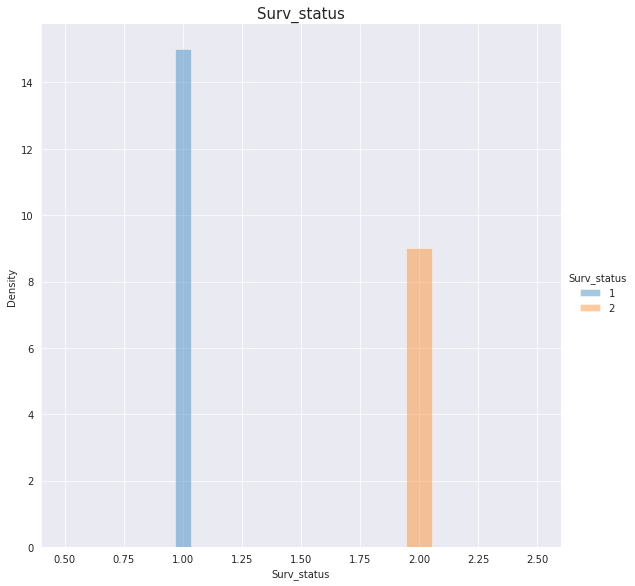

In [14]:
#3. Univariate Analysis of "Surv_status"
sns.set_style("darkgrid")
b=sns.FacetGrid(df,hue="Surv_status",height=8)
b.map(sns.distplot,'Surv_status')
b.add_legend()

plt.title('Surv_status', fontsize=15)
plt.show()



#Observations
* It is clear from the survival status plot that the number of people who have survived for 5 years or more is significantly greater than that of those that died within 5 years. Also we have seen earlier that the number of people who survived for 5 years or more =225 and those who died within 5 years=81.
*  This shows that the chances of survival of the patient for 5 years of more, post surgery is almost **3x**





##Overall Observation of PDF curves:
* I see that best conclusions can only be drawn from histogrms and PDFs of axil_nodes and Surv_status.
* The conclusion from histogram of Surv_status plot is straightforward.
* Hence I will continue with the remaining analysis and plot the CDF curve of axil_nodes to determine the number of people who survived 5 years or longer with 0 axillary nodes.


##b) Cumulative Density Curve of Axillary Nodes plot.

pdf1:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bin edges:  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
________________________________________________________________________________________________
pdf2:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


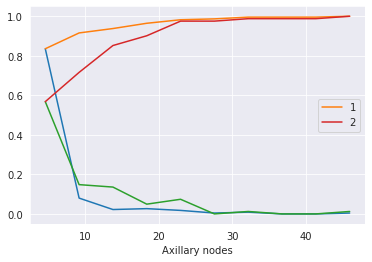

In [15]:
#Compute CDF of df1 and df2
#df1
count_1, bin_edges_1=np.histogram(df1["axil_nodes"],bins=10, density=True)
probability_density_function_1=count_1/sum(count_1)
print("pdf1: ",probability_density_function_1)
print("bin edges: ",bin_edges_1)
cumulative_density_function_1 =np.cumsum(probability_density_function_1)
plt.plot(bin_edges_1[1:],probability_density_function_1)
plt.plot(bin_edges_1[1:], cumulative_density_function_1, label=1)
print('________________________________________________________________________________________________')
#df2
count_2, bin_edges_2=np.histogram(df2["axil_nodes"],bins=10, density=True)
probability_density_function_2=count_2/sum(count_2)
print("pdf2: ",probability_density_function_2)
print("bin edges: ",bin_edges_2)
cumulative_density_function_2 =np.cumsum(probability_density_function_2)
plt.plot(bin_edges_1[1:],probability_density_function_2)
plt.plot(bin_edges_1[1:], cumulative_density_function_2, label=2)
plt.xlabel("Axillary nodes")

plt.legend()
plt.show()

#Observations


*   **83.5%** of the people who survived for 5 years of more had number of axillary nodes in the range of **0 to 4.6**, i.e almost **188 /225** persons.

FROM PDF CURVE-

* The chances of survival is highest when the number of axillary nodes is **0** (i.e there are no axillary nodes between the breast and the arms to carry the cancerous cells from the breast to other parts of the body.



##c) BOX-PLOT with whiskers.

The box-plot is plotted for each of the features with survival status as the x-axis.

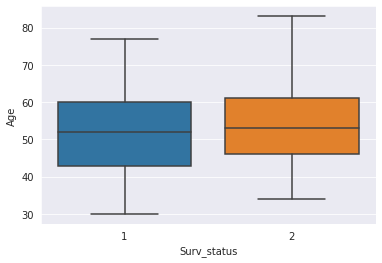

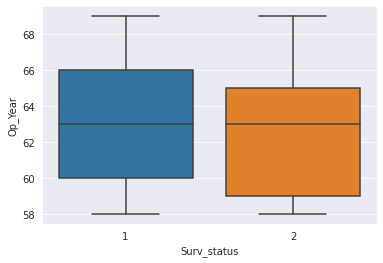

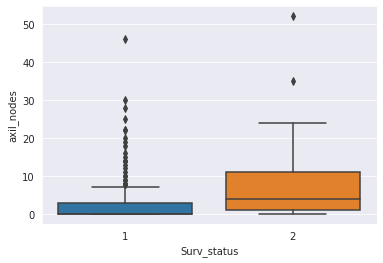

In [16]:
sns.boxplot(x='Surv_status', y='Age', data=df)
plt.show()
sns.boxplot(x='Surv_status', y='Op_Year', data=df)
plt.show()
sns.boxplot(x='Surv_status', y='axil_nodes', data=df)
plt.show()

In [17]:
df1.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [18]:
df2.describe()


,Age,Op_Year,axil_nodes,Surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


#Observations
* Considering both the long survival(5+ years) and short survival (less than
years) dataframes, and the box-plot of 'Age', I see that 25th percentile of df1 (long survival)=43 and 25th perecentile of df2 (short survival)=46. The box-plots have a lot of overlap after age 46. Therefore I see that the number of people who surived long with zero/least chances of short survival are mostly b/w age **30-46**. But in the histogram I see a lot of overlap after the age 40. So we may take the age as **30-40**. A clear if-else statement cannot be used to distinguish  (i.e. if age is less than 40: long survival, else: short survival) as we will see more than 50% error due to overlap. 
* Similarly, considering box-plot of 'Op_Year' and df1 and df2, I see that 75th percentile of df1=66 and 25th perecentile of df2=65. The box-plots have a lot of overlap after before year 1965. Therefore i will consider that the number of people who surived long with least chances of short survival mostly got operated between **1965 and 1966**. A clear if-else statement cannot be made as we will see more than 50% error due to overlap.
* I see that the median or 50th percentile and the 75th percentile for long survival dataframe is 0 and 3 nodes respectively. The 25th percentile and 50th percentile for short survival data frame is 1 and 4 nodes respectivley. Hence by looking at the box-plot of axil-nodes I see that most people who have the highest chance of surviving 5 years or more are those that have **0 or 1 nodes**, because all other nodes have a lot of overlap with the box-plot of short survival. An error of 20-25% will be seen if we try to differentiate by making an if-else statement.



Also inter-quartile range of df2= 75th-25th percentile= 11-1=10.
Hence the top whisker is plotted at Q3+1.5(IQR)= 11 + 1.5(10)=26.

Hence all the nodes which are **greater than 26** are **outliers**(extreme values with respect to the median). This is more accurate than the outliers with respect to the mean.

# d) Violin Plot

The violin-plot is similar to box plot except that it also incorporates the PDF curves. The box-plot lies inside the PDF curves at the side. 
Here we will plot only the axil_nodes violin plot as the observations from the rest are pretty clear from the PDF,CDF and box-plots.

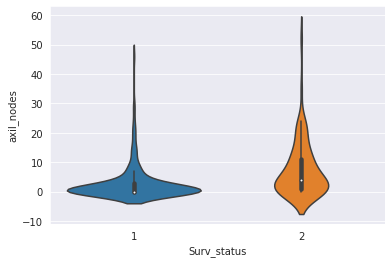

In [19]:
sns.violinplot(x='Surv_status', y='axil_nodes', data=df)
plt.show()

#Observations

* The violin-plot also shows the same for long survival dataframe that people who have **0 or 1** nodes have the maximum chance of surviving 5 years or more.

#2. Bi-variate Analysis (Analysis using 2 variables/features).

##a) Pair-plot

It is a 2D-Plot between all possible pairs of features. 

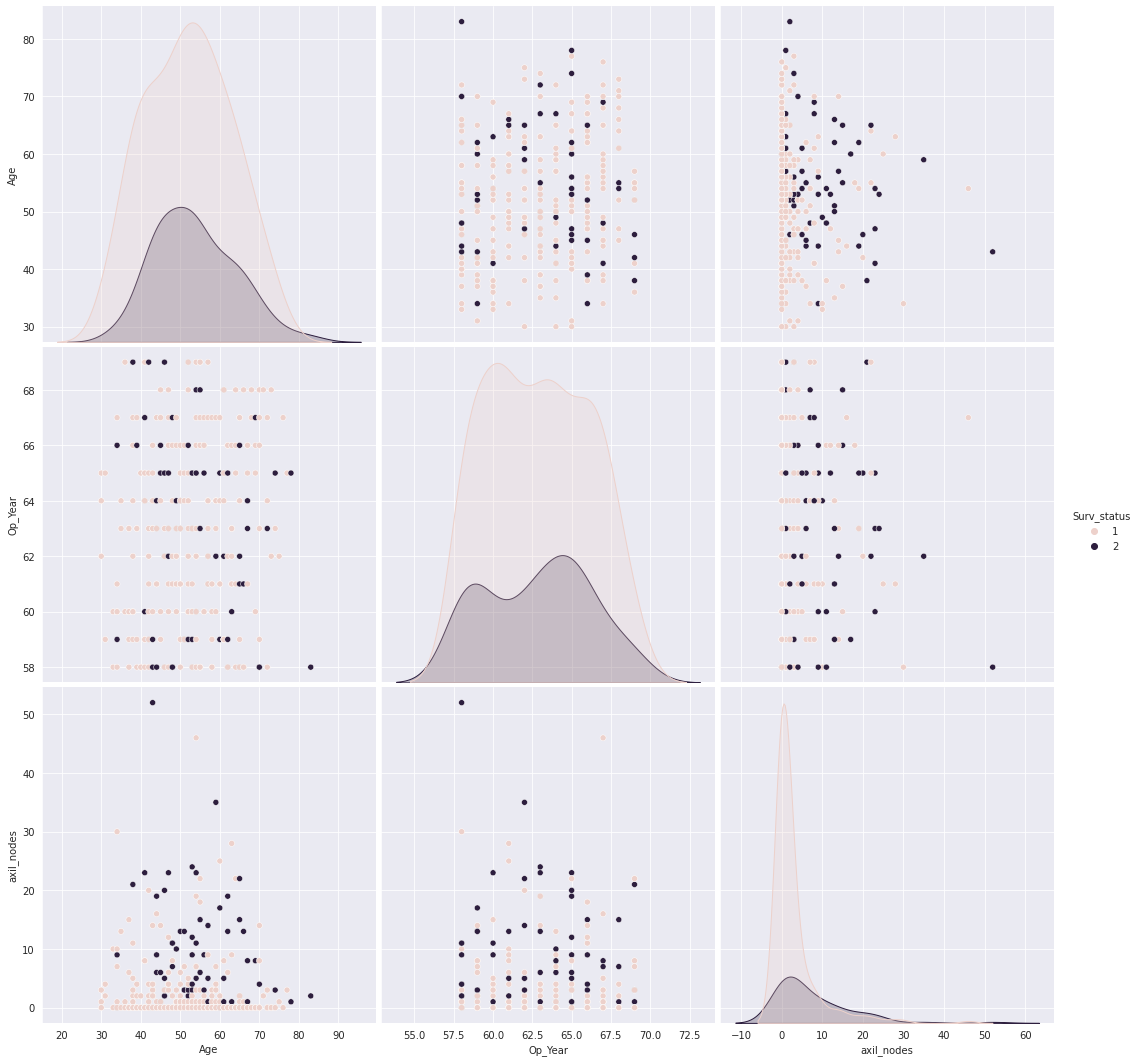

In [20]:
plt.close()
sns.set_style("darkgrid")
sns.pairplot(df, hue="Surv_status", height=5)
plt.show()

#Observations
*  Ignoring plots 1,5 and 9 and only looking at the scatter plots, we find that the best possible plot to draw any conclusions is the plot between axil_nodes (y-axis) and age(x_axis).
*   I see from this plot that all the patients with 0 nodes (irrespective of their age) tend to survive 5 years or more after the operation (***may be subject to error as there may be scaling issues in pair-plot. 2-D scatter plot is more accurate).***
* The immediate next plot (x-axis= Op_Year and y-axis= axil_nodes), tells that irrespective of the operation year, the patients who had 0 axillary nodes tend to survive 5 years or longer, compared to others.
*All other plots have a lot of overlap and no solid conclusion can be drawn.


##b) 2D Scatter-Plot


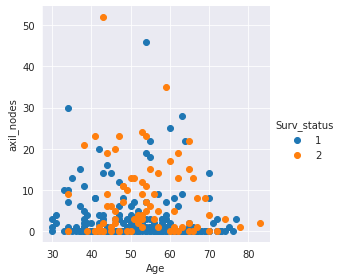

In [21]:
a=sns.FacetGrid(df, hue="Surv_status", height=4) 
a.map(plt.scatter, "Age", "axil_nodes") 
a.add_legend()
plt.show()

##Observations:
*  We need to look at the plot between age and number of axillary nodes for the above mentioned objective.
* Clearly, I cannot find a solid relation b/w age of the patient, number of axillary nodes and survival status using this plot, as there is a lot of overlap between the points.
* But I see from the plot that when the number of axillary nodes are near to 0, the number of patients who have survived for 5 years or longer are more. This is more accurate than the pair-plot above and we can see that not all people who had 0 nodes survived 5 years or longer.

#3. Multivariate Analysis (Analysis using 3 or more variables/features)

##a) Contour Plot
The region of the plot where the blue is darker means that the height of the plot is more (towards the user). The regions with the exactly same shade of blue have the same height. Each line around the blue shades is known as a contour 

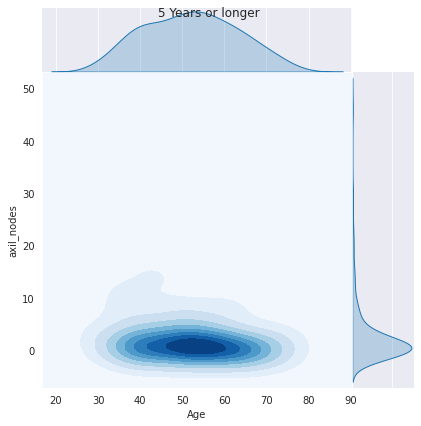

In [22]:
import io
df = pd.read_csv(io.BytesIO(upload['haberman.csv']))
df= pd.read_csv("haberman.csv", header=[0])
df1=df[df['Surv_status']==1]
df2=df[df['Surv_status']==2]
d=sns.jointplot(x="Age", y="axil_nodes",data=df1,kind='kde', space=False, fill=True, thresh=False, cmap='Blues')
d.fig.suptitle("5 Years or longer")
plt.grid()
plt.show()



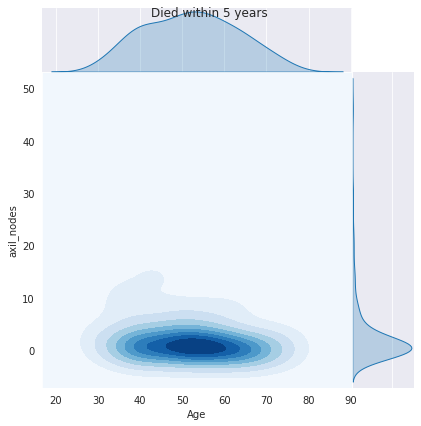

In [23]:
e=sns.jointplot(x="Age", y="axil_nodes",data=df1,kind='kde', space=False, fill=True, thresh=False, cmap='Blues')
e.fig.suptitle("Died within 5 years")
plt.grid()
plt.show()

#Observations
*  I observe that there is most data about the patients whose age is between **46-60** having **0 to 1 nodes** (since the shade of blue is the darkest in this region).
*  But there is nothing to tell whether these patients have suvived 5 years or longer or died within 5 years, as the plots for both have the same darkest region.



# OVERALL CONCLUSION

1.  In line with the objective, I have analysed the Habermans dataset for cancer survival using different kinds of plots and **Exploratory Data Analysis**
2. I can definitely say that the best scenario for patients to have survived 5 years or longer is that they are **aged between 30-40, have 0 axillary nodes and got operated in the year 1965-66**.
3. A clear if-else statement cannot be made as it will be subject to a lot of errors.

